# 01. ÎØ∏Íµ≠ ETF (QQQ) Ï£ºÍ∞Ä ÏòàÏ∏°ÌïòÍ∏∞
>- ÎßÅÌÅ¨: https://finance.yahoo.com/quote/QQQ/history?p=QQQ

>- Í∞úÎ≥Ñ Ï¢ÖÎ™©ÏùÄ Ïô∏Î∂Ä Î≥ÄÏàòÏùò ÏòÅÌñ•ÏùÑ ÎÑàÎ¨¥ ÎßéÏù¥ Î∞õÏùÑ Í≤É Í∞ôÏúºÎãà, ÏßÄÏàòÏ∂îÏ¢Ö ETFÎ•º Îã§Î§ÑÎ¥ÖÏãúÎã§.
>- QQQÎäî NASDAQ(ÎÇòÏä§Îã•)ÏùÑ Ï∂îÏ¢ÖÌïòÎäî ETFÏûÖÎãàÎã§. Ï†ïÌôïÌûàÎäî ÏÉÅÏúÑ 100ÏúÑÍ∂åÍπåÏßÄÏùò Í∏∞ÏóÖÏù¥ Ìè¨Ìï®Îêú ÎÇòÏä§Îã•100ÏùÑ Ï∂îÏ¢ÖÌï©ÎãàÎã§.
>- ÏãúÍ∞ÄÏ¥ùÏï°ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÇ∞Ï∂úÎêòÎäî ÏßÄÏàòÎ°úÏÑú, Ï£ºÎ°ú Í∏∞Ïà†Í∏∞ÏóÖÏ£ºÎ°ú Íµ¨ÏÑ±Îèº ÏûàÏäµÎãàÎã§.
>- ÏûêÏó∞Ïä§ÎüΩÍ≤å QQQÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Íµ¨ÏÑ±ÎèÑ Í∏∞Ïà†Ï£º ÏúÑÏ£ºÎ°ú ÎêòÏñ¥ ÏûàÏ£†.

## (1) ÌïÑÏöîÌïú Ìï®Ïàò Í∞ÄÏ†∏Ïò§Í∏∞

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

import warnings
warnings.filterwarnings('ignore')

print('Done!')

Done!


## (2) ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞

In [2]:
# Time Series ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

data_path = os.getenv('HOME') + '/aiffel/exploration/E_03/QQQ.csv'
df = pd.read_csv(data_path, index_col='Date', parse_dates=True)
ts = df['Close']

print(ts.head())
print(ts.shape) # Ï¥ù 252Í∞ú

Date
2021-05-03    336.190002
2021-05-04    330.140015
2021-05-05    329.029999
2021-05-06    331.510010
2021-05-07    334.200012
Name: Close, dtype: float64
(252,)


‚ñ∂Ô∏é Ïùå, ÎÇ†ÏßúÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î∂àÎü¨ÏôÄÏ°åÏäµÎãàÎã§.

### (3) Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ÌïòÍ∏∞ ###

In [3]:
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå Series[]Î°ú Ï∂úÎ†•

Series([], Name: Close, dtype: float64)

‚ñ∂Ô∏é Í≤∞Ï∏°ÏπòÎäî Îî∞Î°ú ÏóÜÎÑ§Ïöî.

### (4) stationarity Í≤ÄÏ¶ù

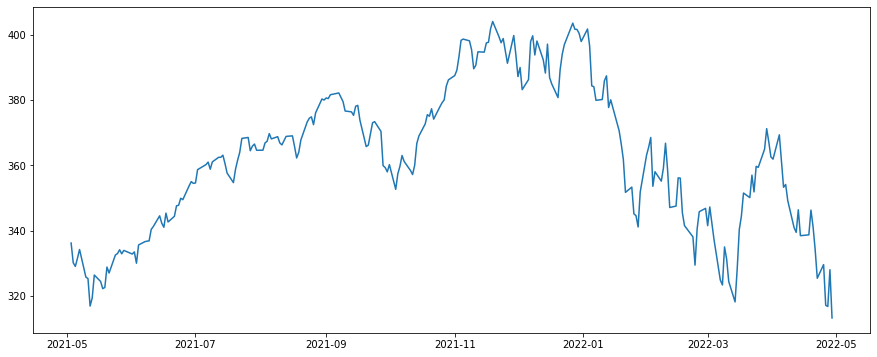

In [4]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6
plt.plot(ts)

‚ñ∂Ô∏é Îî± Î¥êÎèÑ Î≥ÑÎ°ú stationary ÌïòÏßÄ ÏïäÏïÑ Î≥¥ÏûÖÎãàÎã§.

### (5) Î°úÍ∑∏ Î≥ÄÌôò ###

In [5]:
ts_log = np.log(ts)
print('Done!')

Done!


‚ñ∂Ô∏é Í∑∏ÎûòÌîÑÎ•º Î≥¥Îãà Ìé∏Ï∞®Í∞Ä ÌÅ¨ÎÑ§Ïöî. Î°úÍ∑∏ Î≥ÄÌôòÏùÑ Ìï¥ Ï§çÏãúÎã§.

Ïù¥Ï†ú Ï¢Ä ÏïàÏ†ïÌôîÍ∞Ä ÎêòÏóàÏùÑÍπåÏöî?

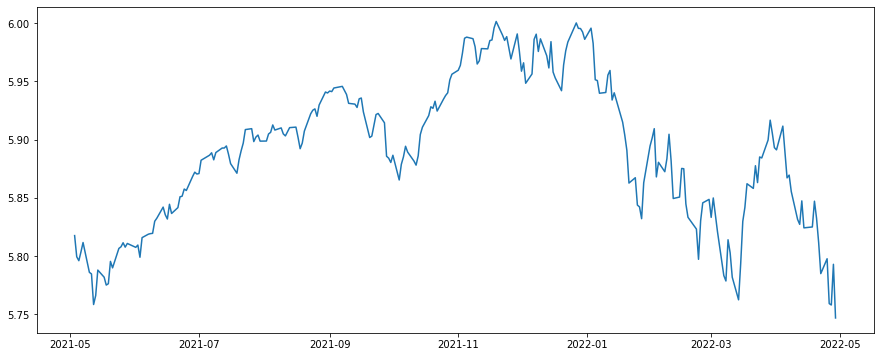

In [6]:
plt.plot(ts_log)

‚ñ∂Ô∏é yÏ∂ïÏùÑ Î≥¥Îãà Í∞íÏù¥ Ïûò Ï°∞Ï†ïÎêòÏóàÏäµÎãàÎã§. Ìé∏Ï∞®Í∞Ä ÎßéÏù¥ Ï§ÑÏóàÍ≤†Íµ∞Ïöî.

ÌïòÏßÄÎßå Ïó¨Ï†ÑÌûà Î∂àÏïàÏ†ïÌïú Í≤ÉÏ≤òÎüº Î≥¥ÏûÖÎãàÎã§. Îã§Î•∏ Î∞©Î≤ïÏùÑ Ïç®Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

### (6) ÏïàÏ†ïÏÑ± Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÏÇ¨Ï†Ñ ÏûëÏóÖ ###

In [7]:
## Íµ¨Í∞Ñ ÌÜµÍ≥ÑÏπò (rolling statistics) ÏãúÍ∞ÅÌôî Ìï®Ïàò

def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôî
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
## ADF Test Ìï®Ïàò
# Ï£ºÏñ¥ÏßÑ ÏãúÍ≥ÑÏó¥Ïù¥ Î∂àÏïàÏ†ïÌïòÎã§ (Í∑ÄÎ¨¥Í∞ÄÏÑ§)

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏùò adfuller Î©îÏÑúÎìú Ìò∏Ï∂ú
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfullerÏóêÏÑú Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    
print('Done!')

Done!


‚ñ∂Ô∏é Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ìï®ÏàòÎ•º Ï†ïÏùòÌï¥Ï§çÎãàÎã§. Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂àÏïàÏ†ïÌïòÎãà ADF testÎ•º ÏúÑÌïú Ìï®ÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

## (7) ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù ##

### (7-1) Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù ###

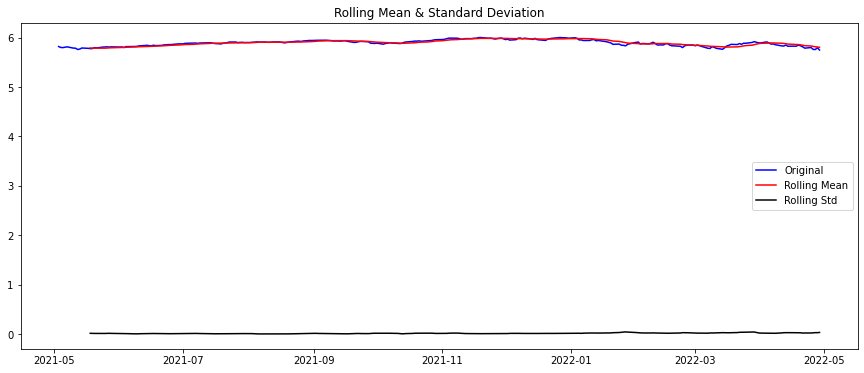

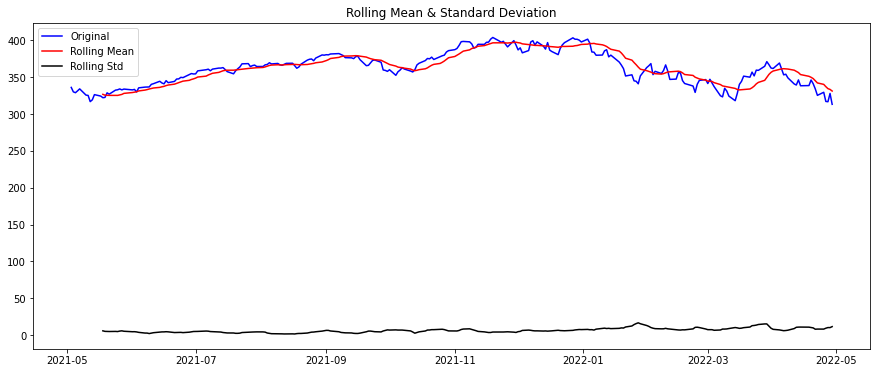

In [8]:
# MA Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)
plot_rolling_statistics(ts, window=12)

‚ñ∂Ô∏é Ïó≠Ïãú Î°úÍ∑∏Î•º Ï∑®Ìï¥Ï£ºÎãà ÏïàÏ†ïÏÑ±Ïù¥ Í∞úÏÑ†ÎêòÍ∏¥ ÌñàÏäµÎãàÎã§.

ÌïòÏßÄÎßå Ïù¥Í±∏Î°úÎäî ÏßÑÏßúÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ÏßÄ ÏïÑÎãåÏßÄ Ïûò Î™®Î•¥Í≤†ÎÑ§Ïöî.

ÏùºÎã® Í≥ÑÏÜç ÏßÑÌñâÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

### (7-2) Ï†ïÎüâÏ†Å ADF test

In [9]:
# Ï†ïÎüâÏ†Å ADF test

augmented_dickey_fuller_test(ts_log)
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.276861
p-value                          0.639691
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -1.306045
p-value                          0.626402
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


‚ñ∂Ô∏é Ïùå, tsÏôÄ ts_log Îëò Îã§ pÍ∞íÏù¥ 0.5Î≥¥Îã§ ÌÅΩÎãàÎã§.

Ïù¥Îü¨Î©¥ ÏïÑÍπå "Ïù¥ ÏãúÍ≥ÑÏó¥Ïù¥ Î∂àÏïàÏ†ïÌïòÎã§" ÎùºÍ≥† Ïû°ÏùÄ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† ÏàòÍ∞Ä ÏóÜÍ≤å Îê©ÎãàÎã§.

#### Ïù¥ Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌï† ÏàòÎäî ÏóÜÏßÄÎßå, Ï†ÅÏñ¥ÎèÑ "tsÏôÄ ts_log Îëê Îç∞Ïù¥ÌÑ∞ Î™®Îëê ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥ÏùÄ ÏïÑÎãàÎã§"Îäî Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌï† ÏàòÎäî ÏûàÍ≤†Ï£†?

Í∑∏Îüº Ïù¥Ï†ú ÏïàÏ†ïÌôîÎ•º ÏúÑÌï¥ Îã§Î•∏ Î∞©Î≤ïÏùÑ Îçî ÏãúÎèÑÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

### (7-3) ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥

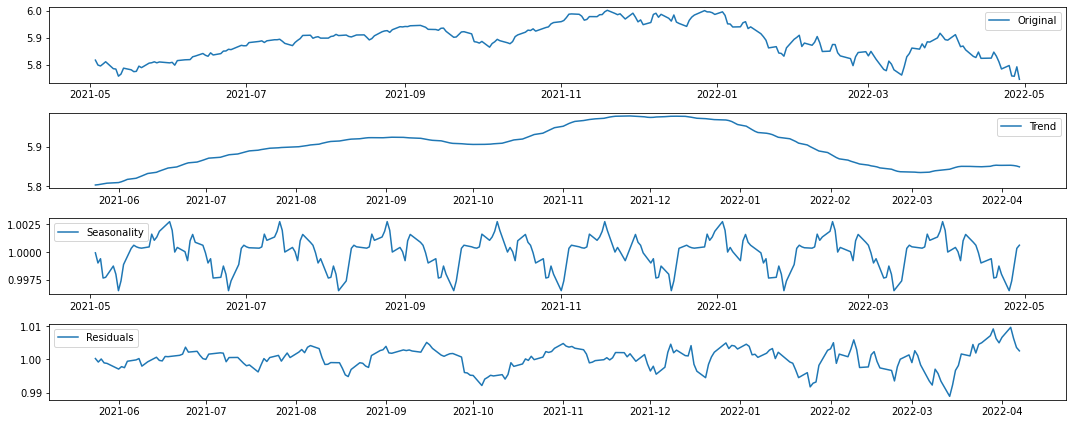

In [10]:
#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

‚ñ∂Ô∏é Ìä∏Î†åÎìúÎ•º Î≥¥Îãà ÌïúÎèôÏïà ÏÉÅÏäπÌïòÎã§Í∞Ä, Ïò¨Ìï¥ Ï¥àÎ∂ÄÌÑ∞ ÌïòÍ∞ïÏÑ∏Î°ú Ï†ëÏñ¥Îì§ÏóàÏäµÎãàÎã§. Í≥ÑÏ†àÏÑ±ÏùÄ ÎöúÎ†∑Ìïú Ìå®ÌÑ¥Ïù¥ Î≥¥Ïù¥ÎÑ§Ïöî.

ÏõêÎûòÎùºÎ©¥ Í≥ÑÏ†àÏÑ±Ïù¥ÎÇò Ìä∏Î†åÎìú Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ïÏùÑ Ìï¥Ï§òÏïº ÌïòÏßÄÎßå, decompose Î©îÏÜåÎìúÎ•º Ïì∞Í≥† ÏûàÏúºÎãà ResidualÎßå ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§.

### (7-4) Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

In [11]:
# Residual

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.298481
p-value                          0.000006
#Lags Used                      14.000000
Number of Observations Used    207.000000
Critical Value (1%)             -3.462342
Critical Value (5%)             -2.875606
Critical Value (10%)            -2.574267
dtype: float64


 ‚ñ∂Ô∏é pÍ∞íÏù¥ ÏïÑÏ£º ÎÇÆÍ≥† ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÎÇòÏòµÎãàÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî Ïã†Î¢∞Ìï† Îßå ÌïòÎã§Îäî ÎúªÏù¥Í≤†ÏßÄÏöî?

## (8) ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

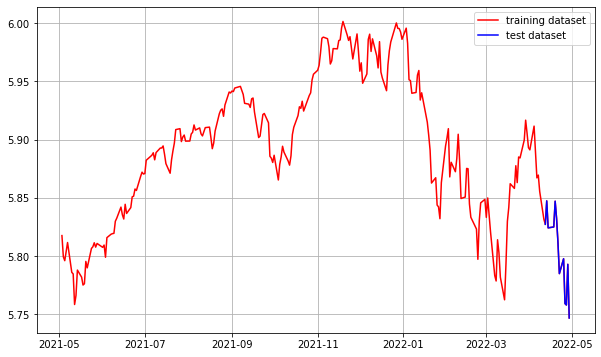

In [12]:
# ÌïôÏäµ ÎπÑÏú® 95%

train_data, test_data = ts_log[:int(len(ts_log)*0.95)], ts_log[int(len(ts_log)*0.95):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # ts_logÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Í∑∏ÎûòÌîÑ ÏÇ¨Ïö©
plt.plot(test_data, c='b', label='test dataset')
plt.legend()


‚ñ∂Ô∏é ÏÇ¨Ïã§ Îü¨ÏãúÏïÑ-Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò Ï†ÑÏüÅ ÎïåÎ¨∏Ïóê ÏµúÍ∑º Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÍ∏∞Îäî Ï°∞Í∏à Ïñ¥Î†§Ïö∏ Í≤ÅÎãàÎã§.

Î™®Îç∏Ïù¥ ÌïôÏäµÌïú Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Í∞Ñ Ï§ëÏóêÎäî Í∑∏ÎßåÌïú Ï†ÑÏüÅÏù¥ ÏóÜÏóàÏúºÎãàÍπåÏöî.

Í∑∏ÎûòÏÑú ÌïôÏäµÎπÑÏú®ÏùÑ Ï°∞Í∏à ÎÜíÏó¨ÏÑú Ï†ÑÏüÅÏù¥ Ï£ºÍ∞ÄÏóê ÎØ∏Ïπú ÏòÅÌñ•ÍπåÏßÄ Ìè¨Ìï®ÏãúÏºú Î≥¥Í≤†ÏäµÎãàÎã§.

ÏòàÏÉÅÏúºÎ°úÎäî Îç∞Ïù¥ÌÑ∞ Ïà´ÏûêÍ∞Ä Îçî ÎßéÏùÑ Îïå Ìö®Í≥ºÏ†ÅÏùº Í≤É Í∞ôÏäµÎãàÎã§. ÌïòÏßÄÎßå ÏßÄÍ∏àÏùÄ daily Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏôîÏúºÎãà Ïù¥Í±∏Î°ú ÏßÑÌñâÌï©ÎãàÎã§.

ÎÇòÏ§ëÏóê Îã§Î•∏ Ï¢ÖÎ™©ÏùÑ Î∂ÑÏÑùÌï† ÎïåÎäî minuteÏù¥ÎÇò hour Îã®ÏúÑÎ°ú Î∂ÑÏÑùÌïòÎ©¥ Îçî Ï†ïÎ∞ÄÌïòÍ≤å Î∂ÑÏÑùÌï† Ïàò ÏûàÏùÑ Í≤ÅÎãàÎã§.

> **Ï∞∏Í≥†: [ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®ÏùÑ Ïñ¥ÎñªÍ≤å Ïû°ÏïÑÏïº Ìï†Íπå?]** |  https://brunch.co.kr/@coolmindory/31

## (9) Ï†ÅÏ†ï ARIMA Ïàò Íµ¨ÌïòÍ∏∞

### (9-1) ACF, PACF Í∑∏Î¶¨Í∏∞ (p, q Íµ¨ÌïòÍ∏∞)

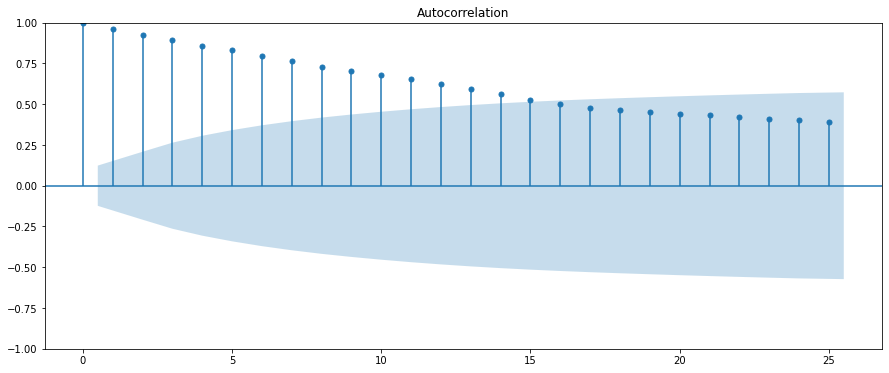

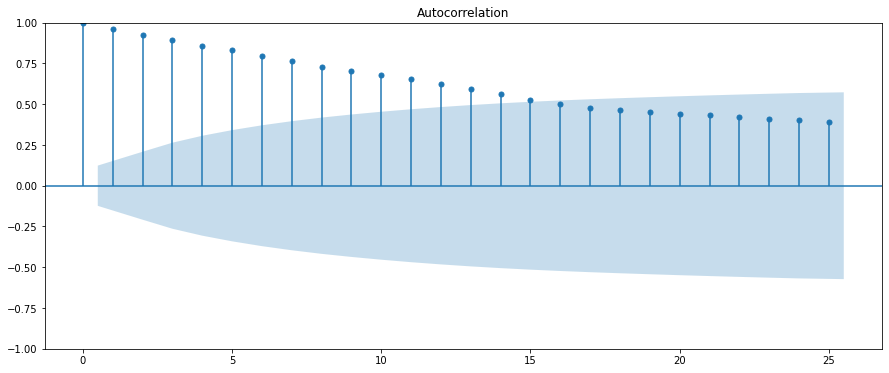

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF Í∑∏ÎûòÌîÑ (qÍ∞í)
plot_acf(ts_log)


‚ñ∂Ô∏é xÏ∂ïÏùÄ ÏÉÅÍ¥ÄÍ≥ÑÏàò, yÏ∂ïÏùÄ ÏãúÏ∞® ÏàòÏûÖÎãàÎã§.

ACFÎäî ÏûêÍ∏∞ÏÉÅÍ¥ÄÍ≥ÑÏàò, Í∑∏Îü¨ÎãàÍπå ÏûêÍ∏∞ ÏûêÏã†Í≥º ÏñºÎßàÎÇò Î∞ÄÏ†ëÌïú Í¥ÄÍ≥ÑÎ•º Í∞ñÍ≥† ÏûàÎäîÍ∞ÄÏóê ÎåÄÌïú Ìï®ÏàòÏûÖÎãàÎã§.

"Í≥ºÍ±∞Ïùò ÏûêÏã†Ïù¥ ÌñàÎçò ÌñâÎèôÏùÑ ÌòÑÏû¨ÏóêÎèÑ Î∞òÎ≥µÌïúÎã§Î©¥, ÏûêÍ∏∞ ÏûêÏã†Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§Í≥† Ìï† Ïàò ÏûàÎã§" Îäî ÎßêÏù¥ÏßÄÏöî. Ï¶â, ACFÎ•º ÌÜµÌï¥ÏÑú AR Î™®Îç∏ÏùÑ ÏÑ§Î™ÖÌï† Ïàò ÏûàÏäµÎãàÎã§.

ÏâΩÍ≤å ÎßêÌï¥ÏÑú ÏúÑ Í∑∏ÎûòÌîÑÏùò ÏÉâÏπ†Îêú Î∂ÄÎ∂Ñ ÏïàÏóê Îì§Ïñ¥Í∞ÄÎäî ÏãúÏ†êÎ∂ÄÌÑ∞ Îëê ÏöîÏÜåÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Ï†úÎåÄÎ°ú Î∂ÑÏÑùÌï† Ïàò ÏûàÎã§Îäî ÎúªÏûÖÎãàÎã§.

Ìï¥Îãπ ÏßÄÏ†êÏùÄ 16Î≤àÏß∏Ïù¥Îãà ÏµúÏÜå 15Í∞úÍπåÏßÄÎäî ÌïôÏäµÏùÑ Ìï¥Ïïº ÌïòÍ≤†Íµ∞Ïöî.

#### <span style="color:indianred"> Îî∞ÎùºÏÑú qÍ∞íÏùÄ 15ÏûÖÎãàÎã§! </span>



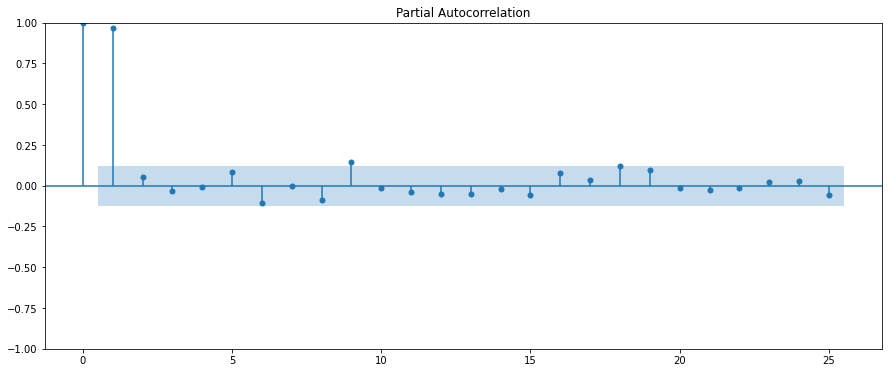

In [14]:
# PACF (p)
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()         


‚ñ∂Ô∏é PACFÎäî Î∂ÄÎ∂Ñ ÏûêÍ∏∞ÏÉÅÍ¥ÄÌï®ÏàòÏûÖÎãàÎã§.

Ïù¥Í≤å Î¨¥Ïä® ÎßêÏù¥ÎÉê? ACFÎäî Í≥ºÍ±∞ÏôÄ ÌòÑÏû¨ Í∏∞Í∞Ñ ÏÇ¨Ïù¥Ïùò Î≥ÄÏàòÎì§ÏùÑ ÌÜ†ÎåÄÎ°ú ÌòÑÏû¨ ÏãúÏ†êÏùÑ ÏòàÏ∏°ÌïúÎã§Í≥† ÌñàÏ£†?

PACFÎäî Í≥ºÍ±∞Ïùò Î≥ÄÏàòÎì§ÏùÑ Í≥†Î†§ÌïòÏßÄ ÏïäÍ≥†, Í≥ºÍ±∞ Îî± Í≥† ÏãúÏ†êÍ≥º ÌòÑÏû¨ ÏãúÏ†êÎßåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßåÏùÑ Îã§Î£®Îäî Ìï®ÏàòÏûÖÎãàÎã§.

ACFÎûë ÏõêÎ¶¨Îäî Í∞ôÏäµÎãàÎã§.


#### <span style="color:indianred"> Îî∞ÎùºÏÑú pÍ∞íÏùÄ 1ÏûÖÎãàÎã§! </span>


### (9-2) Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ (d Íµ¨ÌïòÍ∏∞)


Results of Dickey-Fuller Test:
Test Statistic                -1.545154e+01
p-value                        2.780048e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


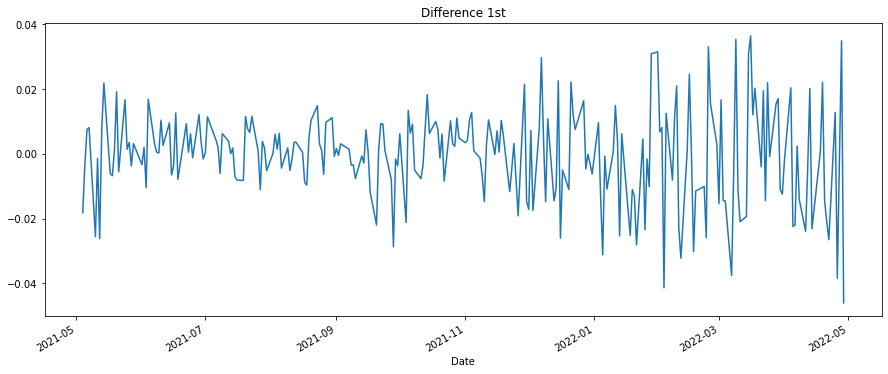

In [15]:
# 1Ï∞® Ï∞®Î∂Ñ

diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

‚ñ∂Ô∏é Ïùå... ÏôÑÎ≤ΩÌïòÏßÑ ÏïäÏßÄÎßå ÍΩ§ stationaryÌï¥ ÏßÑ Í≤É Í∞ôÏäµÎãàÎã§. pÍ∞íÎèÑ ÏÉÅÎãπÌûà ÎÇÆÏïÑÏöî.

ÌïòÏßÄÎßå Î≠îÍ∞Ä ÏïÑÏâΩÏäµÎãàÎã§. ÏïÑÏßÅ Î≥ÄÎèôÏÑ±Ïù¥ Îã§ ÏÇ¨ÎùºÏßÄÏßÄ ÏïäÏùÄ Í≤É Í∞ôÎÑ§Ïöî.

Ï∞®Î∂ÑÏùÑ Ìïú Î≤à Îçî Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

Results of Dickey-Fuller Test:
Test Statistic                -8.389871e+00
p-value                        2.382643e-13
#Lags Used                     1.200000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


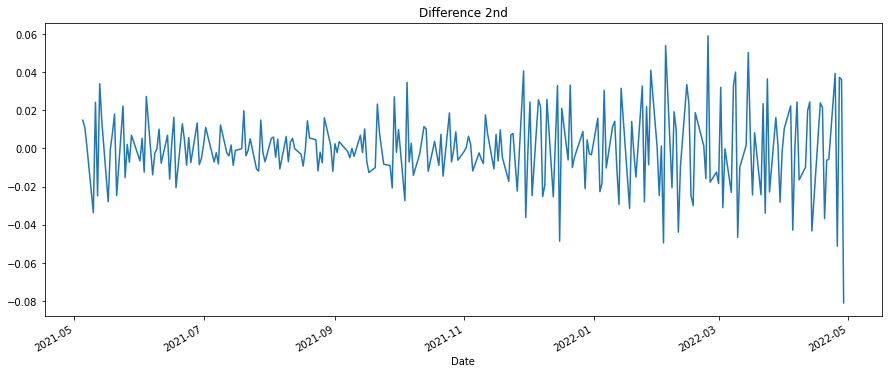

In [16]:
# 2Ï∞® Ï∞®Î∂Ñ

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

‚ñ∂Ô∏é WA! ÏÉÅÎãπÌûà ÏïàÏ†ïÏ†ÅÏúºÎ°ú Î≥ÄÌñàÎÑ§Ïöî!

ÌòπÏãú 3Ï∞® Ï∞®Î∂ÑÏùÑ ÌïòÎ©¥ Îçî ÏïàÏ†ïÏ†ÅÏúºÎ°ú Îê†ÍπåÏöî?

Results of Dickey-Fuller Test:
Test Statistic                -9.607598e+00
p-value                        1.848211e-16
#Lags Used                     1.500000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


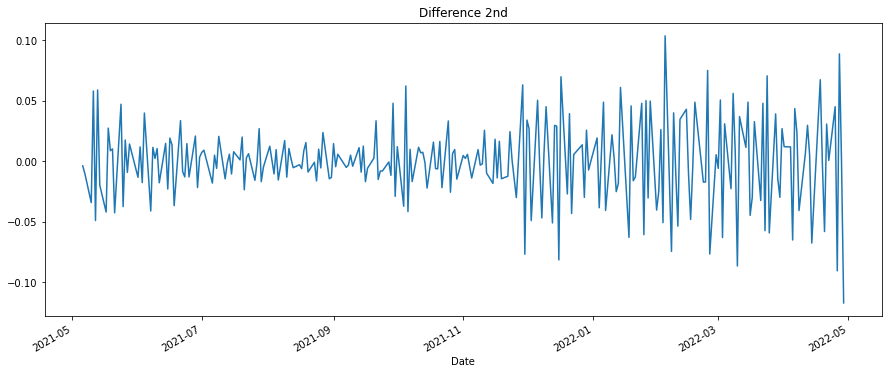

In [17]:
# 3Ï∞® Ï∞®Î∂Ñ

diff_3 = diff_2.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_3)

‚ñ∂Ô∏é ÏÇ¥Ïßù Ïï†Îß§ÌïòÍµ∞Ïöî.

#### <span style="color:indianred"> d=2Î∂ÄÌÑ∞ ÍΩ§ ÏïàÏ†ïÏ†ÅÏúºÎ°ú Î≥¥Ïù¥Îãà, ÏùºÎã® d=2Î°ú ÎÜìÍ≥† ÏßÑÌñâÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§. </span>

## (10) ARIMA Î™®Îç∏ ÌõàÎ†® & ÌÖåÏä§Ìä∏

### (10-1) Î™®Îç∏ ÎπåÎìú & fitting

In [18]:
# Build Model

model = ARIMA(train_data, order=(1, 2, 15))  # p=1, d=2, q=15
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  239
Model:                ARIMA(1, 2, 15)   Log Likelihood                 691.017
Date:                Wed, 04 May 2022   AIC                          -1348.034
Time:                        09:16:01   BIC                          -1289.077
Sample:                             0   HQIC                         -1324.270
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6836      0.117     -5.854      0.000      -0.913      -0.455
ma.L1         -0.1517      0.132     -1.146      0.252      -0.411       0.108
ma.L2         -0.7792      0.102     -7.662      0.0

‚ñ∂Ô∏é Ïñ¥...WarningÏù¥ Îú®ÎäîÎç∞... ÏïÑ, Í≤ΩÍ≥†Í∞Ä ÏïÑÎãàÎùº Ï∞∏Í≥†ÌïòÎùºÍ≥† ÏïåÎ†§Ï£ºÎäî Í±∞Íµ∞Ïöî. Îã§ÌñâÏûÖÎãàÎã§.

Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÏãúÎã§.

### (9-2) Í≤∞Í≥º ÏãúÍ∞ÅÌôî

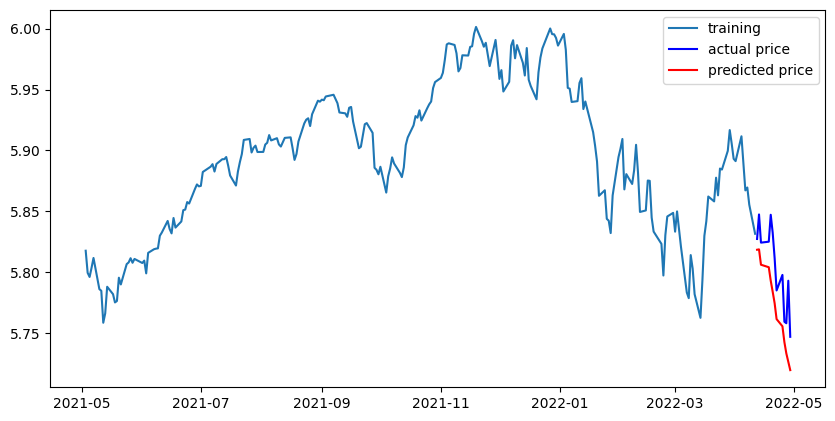

In [19]:
# Forecast
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% Ïã†Î¢∞ÏàòÏ§Ä
fc = np.array(fc)


# pandas seriesÎ°ú Î≥ÄÌôò
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º


# PlotÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

‚ñ∂Ô∏é Ïò§, ÏÉÅÎãπÌûà Ï†ïÌôïÌïú Í≤ÉÏ≤òÎüº Î≥¥ÏûÖÎãàÎã§!

Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°∞Í∏à Îçî ÏúÑÏ™ΩÏúºÎ°ú ÏûêÍæ∏ ÏπòÏÜüÎäî Í≤ΩÌñ•ÏùÄ ÏïÑÎ¨¥ÎûòÎèÑ Ï£ºÍ∞Ä Ìè≠ÎùΩÏùÑ ÎßâÍ∏∞ ÏúÑÌïú ÏÇ¨ÎûåÎì§Ïùò ÎÖ∏Î†•Ïùò ÌùîÏ†ÅÏù¥Í≤†Ï£†?

### (9-3) Ï†ïÌôïÎèÑ ÌåêÏ†ï

In [20]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  136.8831001430811
MAE:  10.474089982833116
RMSE:  11.69970513060398
MAPE: 3.15%


‚ñ∂Ô∏é MAPE Í∞íÎèÑ Ï†ÅÏ†àÌïòÎÑ§Ïöî. Profit!

---

# 02. SPY ETF Î∂ÑÏÑù
>- SPYÎäî S&P 500ÏùÑ Ï∂îÏ¢ÖÌïòÎäî ETFÏûÖÎãàÎã§.
>- S&P 500ÏùÄ ÎØ∏Íµ≠Ïùò Ïã†Ïö©ÌèâÍ∞ÄÏÇ¨Ïù∏ standard & poorsÍ∞Ä ÎÇòÏä§Îã•, Îâ¥ÏöïÏ¶ùÏãúÏóêÏÑú ÏÑ†Î≥ÑÌïú 500Í∞ú Í∏∞ÏóÖÏùò Ï£ºÍ∞Ä ÏßÄÏàòÏûÖÎãàÎã§.
>- Íµ¨Ï≤¥Ï†ÅÏúºÎ°úÎäî Í≥µÏóÖÏ£º 400Í∞ú, Ïö¥ÏàòÏ£º 20Í∞ú, Í≥µÍ≥µÏ£º 40Í∞ú, Í∏àÏúµÏ£º 20Í∞úÎ°ú Íµ¨ÏÑ±Îèº ÏûàÏäµÎãàÎã§.
>- ÏãúÍ∞Ä Ï¥ùÏï°Ïóê Îî∞ÎùºÏÑú Ï¢ÖÎ™©ÏùÑ ÏÑ†Ï†ïÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÎåÄÌëúÏÑ±Ïù¥ ÌÅ¨Îã§Í≥† ÌèâÍ∞ÄÎ∞õÍ≥† ÏûàÏäµÎãàÎã§. ÎØ∏ Ï¶ùÏãú Ìà¨ÏûêÌï† Îïå Í∞ÄÏû• ÎßéÏù¥ Ï∞∏Í≥†ÌïòÎäî ÏßÄÏàòÏù¥Í∏∞ÎèÑ ÌïòÏ£†.

‚ñ∂Ô∏é Ìé∏ÏùòÏÉÅ Î∂ÑÏÑù Í≥ºÏ†ïÏùÄ Î™®ÎìàÌôîÌï¥ÏÑú ÏÇ¨Ïö©Ìï†Í≤åÏöî!

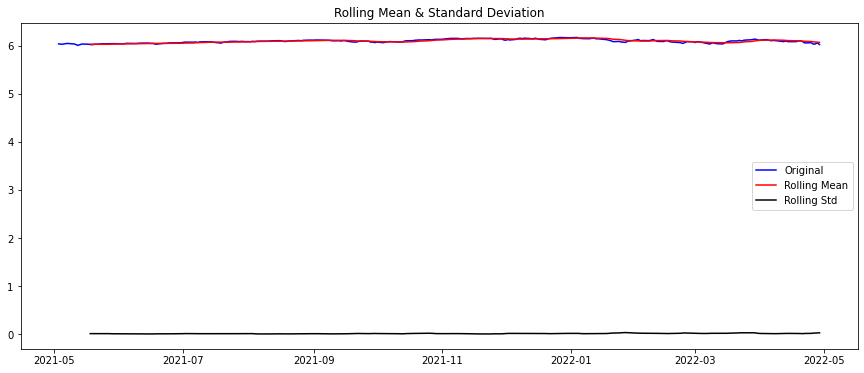

Results of Dickey-Fuller Test:
Test Statistic                  -2.014766
p-value                          0.280137
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.274312
p-value                          0.000006
#Lags Used                       1.000000
Number of Observations Used    220.000000
Critical Value (1%)             -3.460428
Critical Value (5%)             -2.874769
Critical Value (10%)            -2.573821
dtype: float64


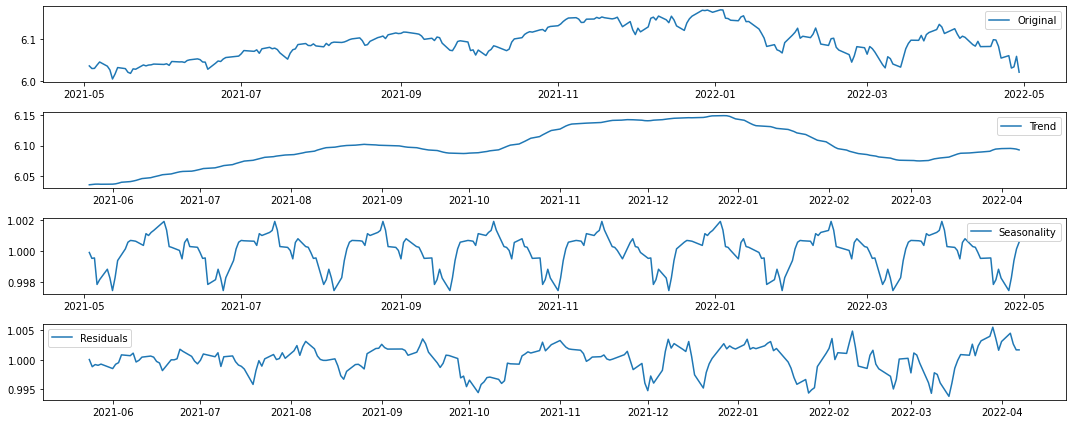

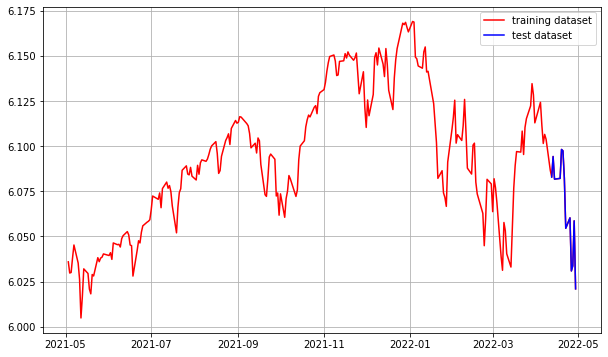

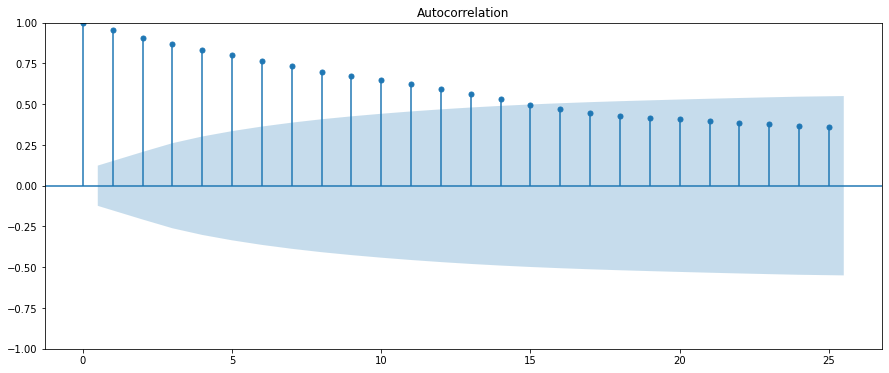

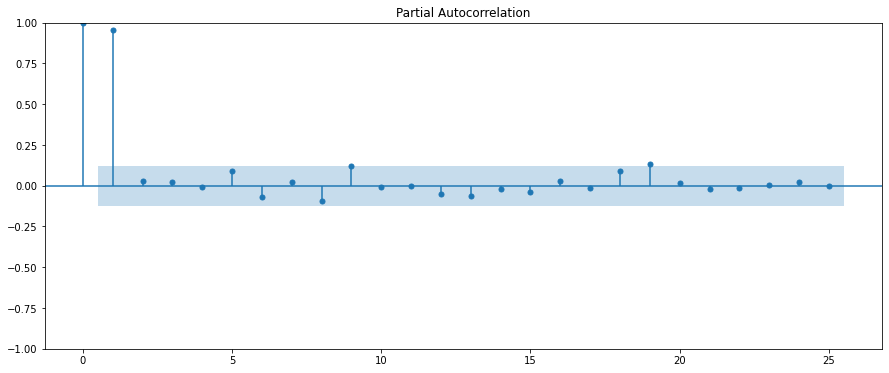

Results of Dickey-Fuller Test:
Test Statistic                -1.227214e+01
p-value                        8.592709e-23
#Lags Used                     1.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.137358e+00
p-value                        1.050447e-12
#Lags Used                     1.200000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


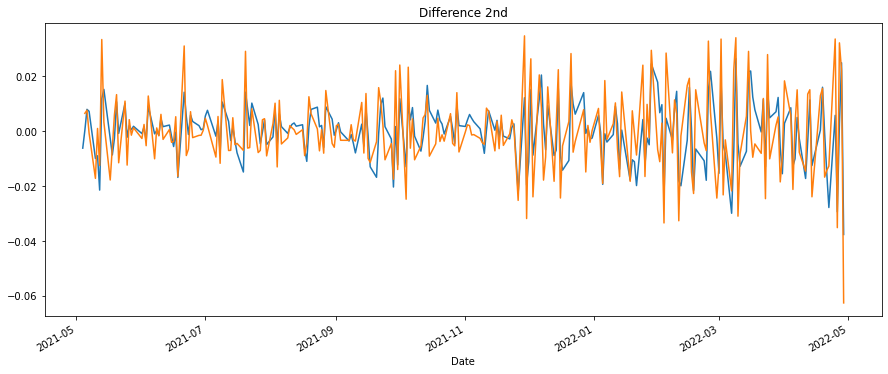

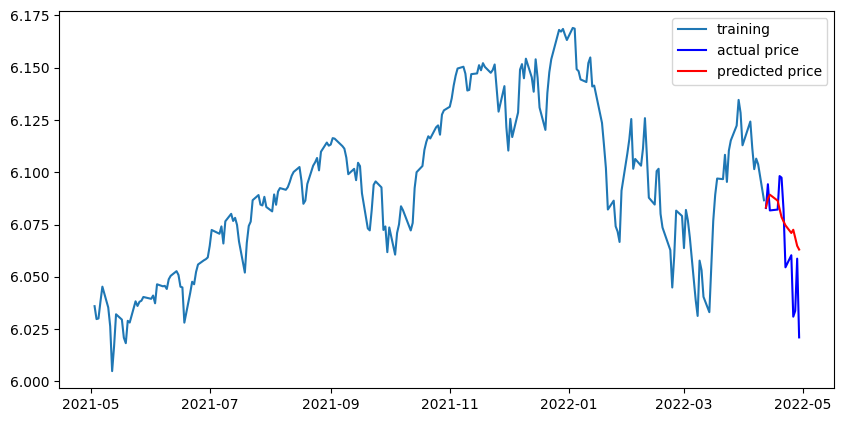

MSE:  84.25628382088505
MAE:  7.0926170923445095
RMSE:  9.179122170495665
MAPE: 1.67%


In [21]:
# Î™®Îìà Í∞ÄÏ†∏Ïò§Í∏∞
import arima_pred

# pred(p, d, q, train_rate, file_path) ÌòïÏãùÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# arima_pred.arm_pred(2, 1, 2, 0.95, '/aiffel/exploration/E_03/SPY.csv') # Ï¥àÍ∏∞Í∞í ÏûÑÏùò Î∞∞Ï†ï ÌõÑ Ï°∞Ï†ï

arima_pred.arm_pred(1, 2, 15, 0.95, '/aiffel/exploration/E_03/SPY.csv') # p=1, d=2, q=15 / d=3ÏùºÎïåÎäî Ïò§Ï∞®Í∞Ä ÎÑàÎ¨¥ Ïª§Ïßê



‚ñ∂Ô∏é MAPE Í∞íÏù¥ 1.67%Î°ú QQQÎ•º Î∂ÑÏÑùÌñàÏùÑ ÎïåÎ≥¥Îã§ Ìõ®Ïî¨ ÎÇÆÏïÑÏ°åÏäµÎãàÎã§. Ï¢ãÏïÑÏöî!

Í∑∏ÎûòÌîÑÎ•º Î≥¥Îãà ÏòàÏ∏° Ï†ÅÏ§ëÎ•†ÎèÑ ÍΩ§ ÎÜíÏäµÎãàÎã§. Ìù†, Í∑∏Îü∞Îç∞ Ïã§Ï†ú Ï£ºÍ∞ÄÏùò Ïù¥ÎèôÏùÑ Î≥¥Îãà QQQÎ≥¥Îã§ Îçî Ïûò Î™ª Î≤ÑÌã∞Í≥† ÏòàÏ∏°ÏπòÎ≥¥Îã§ Îçî ÎÇ¥Î†§Í∞Ä Î≤ÑÎ†∏Íµ∞Ïöî.

ÏïÑÍπå QQQÎäî ÎÇòÏä§Îã•ÏùÑ Ï∂îÏ¢ÖÌïòÍ≥†, SPYÎäî S&PÎ•º Ï∂îÏ¢ÖÌïúÎã§Í≥† ÌñàÏóàÏ£†?

QQQÎäî ÎπÑÍµêÏ†Å Ïûò Î≤ÑÌã∞Îäî Î∞òÎ©¥, SPYÎäî ÏôÑÏ†ÑÌûà ÎÇòÎùΩÏúºÎ°ú Í∞ÄÍ≥† ÏûàÏñ¥Ïöî. üò¢

---

# ESGU ETF Î∂ÑÏÑù
- Ïù¥Î≤àÏóêÎäî Îã§Î•∏ ÌÖåÎßàÏùò ETFÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
- ESGUÎäî ESG(Environmental, Social and Governance)Î•º ÌÖåÎßàÎ°ú ÌïòÎäî ETFÏûÖÎãàÎã§.
- ESGÌïòÎ©¥ ÌùîÌûà ÏÉùÍ∞ÅÌïòÎäî ÌôòÍ≤Ω Í∏∞ÏóÖÎèÑ Ìà¨ÏûêÌïòÏßÄÎßå, Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Îäî Ï£ºÎ°ú IT Í∏∞Ïà† Í∏∞ÏóÖÎì§Î°ú Íµ¨ÏÑ±Îèº ÏûàÏäµÎãàÎã§.
- ESG ÏßÄÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú Ìà¨ÏûêÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Î¨¥Í∏∞ÏôÄ Í¥ÄÎ†®Îêú ÏÇ¨ÏóÖ(Î∞©ÏúÑÏÇ∞ÏóÖÏ≤¥ Îì±), Îã¥Î∞∞, ÏÑùÌÉÑÏù¥ÎÇò ÏÑùÏú† Îì±Ïùò ÏóêÎÑàÏßÄ ÌöåÏÇ¨Îäî Ìà¨ÏûêÌïòÏßÄ ÏïäÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏäµÎãàÎã§.

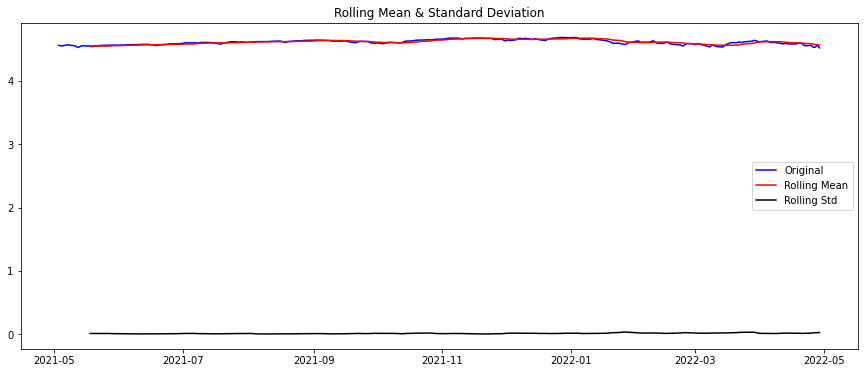

Results of Dickey-Fuller Test:
Test Statistic                  -1.728683
p-value                          0.416398
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.036955
p-value                          0.000019
#Lags Used                      14.000000
Number of Observations Used    207.000000
Critical Value (1%)             -3.462342
Critical Value (5%)             -2.875606
Critical Value (10%)            -2.574267
dtype: float64


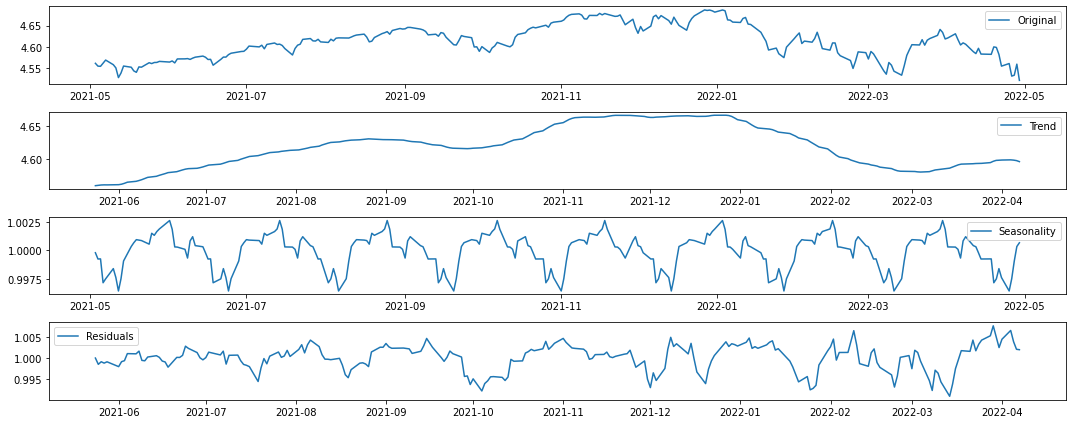

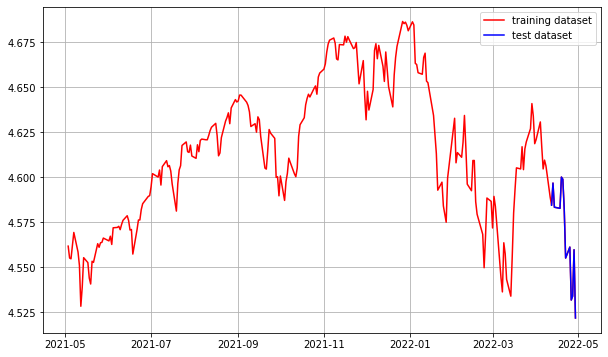

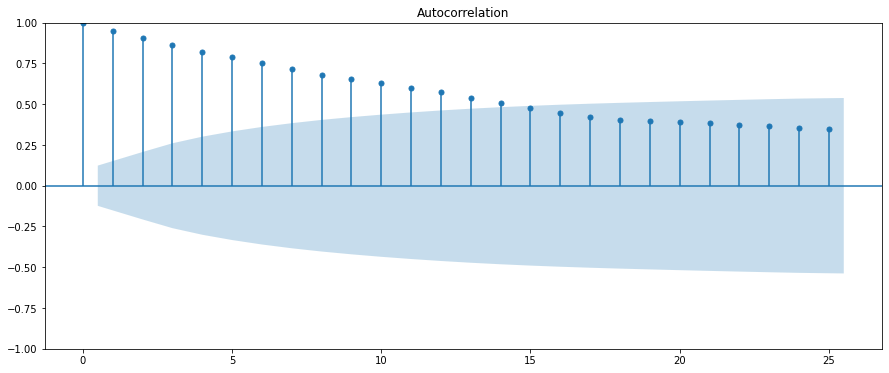

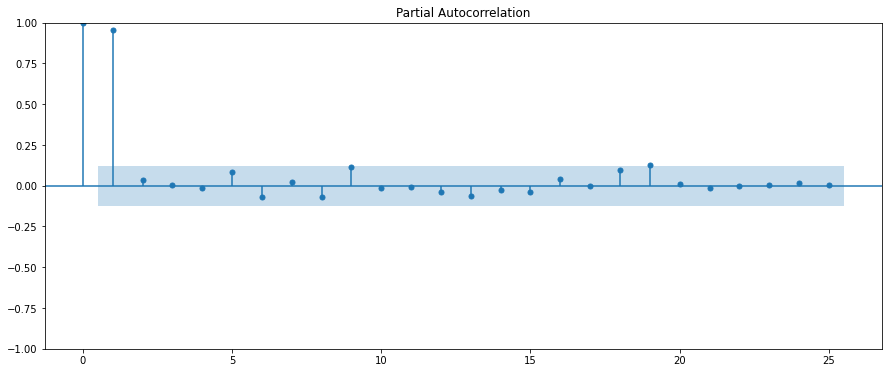

Results of Dickey-Fuller Test:
Test Statistic                -1.218186e+01
p-value                        1.345838e-22
#Lags Used                     1.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.256911e+00
p-value                        5.207402e-13
#Lags Used                     1.200000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


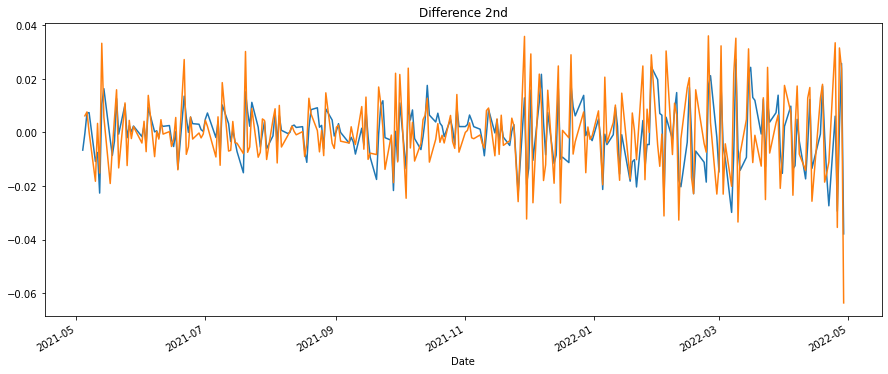

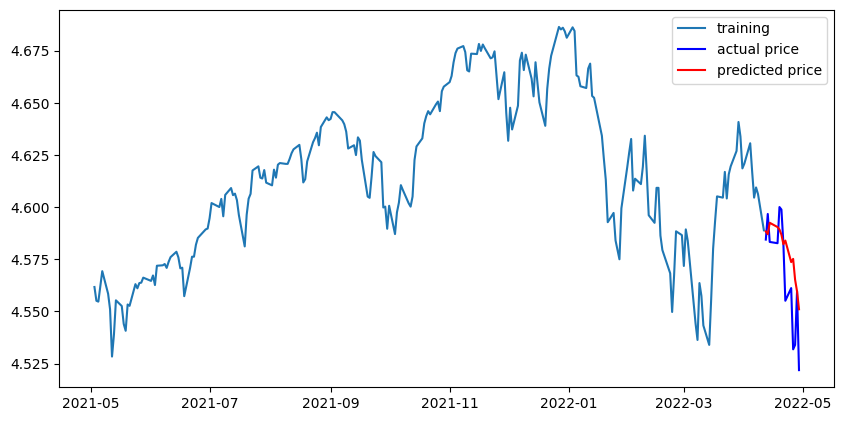

MSE:  3.6389491393003954
MAE:  1.467051657513599
RMSE:  1.907602982619915
MAPE: 1.55%


In [22]:
# ÎèåÎ†§ÎèåÎ†§~

# arima_pred.arm_pred(1, 1, 15, 0.95, '/aiffel/exploration/E_03/ESGU.csv') # ÏûÑÏùòÏßÄÏ†ï ÌõÑ Ï°∞Ï†ï

arima_pred.arm_pred(1, 3, 14, 0.95, '/aiffel/exploration/E_03/ESGU.csv') # p=1, d=3, q=14


‚ñ∂Ô∏é Ïùå, Ïù¥Î≤àÏóêÎèÑ SPYÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ï°∞Í∏à Î≤ÑÌã∞Îã§Í∞Ä ÌõÖ ÎÇ¥Î†§Í∞Ä Î≤ÑÎ¶¨Îäî Î™®ÏäµÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

Ïã¨ÏßÄÏñ¥ MAPE Í∞íÏùÄ Ï†êÏ†ê ÎÇÆÏïÑÏßÄÍ≥† ÏûàÍµ∞Ïöî. Í∑∏ÎûòÎèÑ ÏïûÏÑú ÏÇ¥Ìé¥Î¥§Îçò SPY ETFÏóê ÎπÑÌï¥ÏÑúÎäî Ïûò Î≤ÑÌã∞Îäî Ìé∏ÏûÖÎãàÎã§.


---

# Í≤∞Î°†

>#### QQQ
>- ÎÇòÏä§Îã•100 Ï∂îÏ¢Ö | Í∏∞Ïà†Í∏∞ÏóÖ ÏúÑÏ£º | ÏòàÏ∏°ÏπòÎ≥¥Îã§ ÎÜíÏùå
>
>#### SPY
>- S&P500 Ï∂îÏ¢Ö  | Ï†úÏ°∞,Í≥µÏóÖ ÏúÑÏ£º | ÏòàÏ∏°ÏπòÎ≥¥Îã§ ÎßéÏù¥ ÎÇÆÏùå
>
>#### ESGU
>- ESG, IT Ïö∞ÎüâÏ£º ÏúÑÏ£º | ÏòàÏ∏°ÏπòÎ≥¥Îã§Îäî ÎÇÆÏßÄÎßå SPYÎ≥¥Îã® ÏïàÏ†ïÏ†Å

### ‚ñ∂Ô∏é Ï¶â, Ïö∞Î¶¨Îäî ÌòÑÏû¨ ÌïòÎùΩÏÑ∏Ïóê <span style="color:indianred">Í∏∞Ïà†Í∏∞ÏóÖÏ£º(Ï£ºÎ°ú IT)Í∞Ä Ïûò Î≤ÑÌã∞Í≥†, Ï†úÏ°∞ÏóÖ/Í≥µÏóÖ ÌöåÏÇ¨Îì§Ïù¥ ÌÉÄÍ≤©ÏùÑ ÌÅ¨Í≤å Î∞õÍ≥† ÏûàÎã§</span>Îäî  Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§!

(ÏóÑÎ∞ÄÌûàÎäî ETF Í∞úÎ≥Ñ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Íµ¨ÏÑ±Ïóê Îî∞Îùº Í∞ÄÏ§ëÏπòÎ•º Îî∞Î°ú Ï§òÏïº ÌïòÏßÄÎßå, ÏùºÎã® Ïù¥Îü∞ ÏãùÏúºÎ°ú Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÏñªÏùÑ Ïàò ÏûàÎã§- Í≥†Îßå Ïù¥Ìï¥ÌïòÍ≥† ÎÑòÏñ¥Í∞ÄÍ≤†ÏäµÎãàÎã§.)


>ÏÇ¨Ïã§ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÏÉùÍ∞ÅÌïòÎ©¥ ÎãπÏó∞Ìûà IT Í∏∞ÏóÖÏù¥ Ï†úÏ°∞ÏóÖ/Í≥µÏóÖ ÌöåÏÇ¨Î≥¥Îã§ Î¶¨Ïä§ÌÅ¨ Ìó∑ÏßïÏùÄ Îçî ÏâΩÎã§Í≥† ÏÉùÍ∞ÅÌï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.
>
>Ïñ¥Ï®åÎì† ÌõÑÏûêÎäî Ïã§ Ï†úÌíàÏùÑ Ï†úÏ°∞Ìï¥Ïïº ÌïòÎãàÍπå ÏÉùÏÇ∞ÎπÑÍ∞Ä ÎßéÏù¥ Îì§Ïñ¥Í∞ÄÏ£†. Ïù¥Í≤å ÎîîÏßÄÌÑ∏ Í∏∞ÏóÖÏùò Ïû•Ï†êÏù¥Í∏∞ÎèÑ ÌïòÍ≥†Ïöî.
>
>ÌïòÏßÄÎßå Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî **<U>Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Ïã§Ï†úÎ°ú Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÎèÑÏ∂úÌï¥ÎÉàÎã§</U>**Îäî Îç∞ ÏùòÏùòÎ•º ÎëòÍ≤åÏöî! üòâ

---

# <span style="color:slateblue">ÌöåÍ≥†</span> 

Ïó≠Ïãú ÏÑ∏ÏÉÅÏóê ÏôÑÎ≤ΩÌïú Í±¥ ÏóÜÎäî Í≤É Í∞ôÏäµÎãàÎã§. üò¢

ÏùºÎ∂ÄÎü¨ ÌÅ¨Í≥† ÏûëÏùÄ Ïô∏Î∂Ä Î≥ÄÏàòÏùò ÏòÅÌñ•Î†•ÏùÑ Ï§ÑÏù¥Í≥†Ïûê ÏßÄÏàòÏ∂îÏ¢ÖÌòï ÌéÄÎìúÎì§ÏùÑ Î∂ÑÏÑùÌï¥Î¥§ÎäîÎç∞, Í∑∏ÎüºÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïô∏Î∂Ä Î≥ÄÏàòÏùò ÏòÅÌñ•Î†•Ïù¥ ÏÉùÍ∞ÅÎ≥¥Îã§ Í∞ïÌïú Í≤É Í∞ôÎçîÎùºÍ≥†Ïöî. ÏïÑÎßà Ïù∏Í≥µÏßÄÎä•ÏùÑ Ï£ºÏãù Î∂ÑÏÑùÏóê ÌôúÏö©ÌïòÎ†§Îäî ÏÇ¨ÎûåÏù¥ ÍµâÏû•Ìûà ÎßéÏùÑ Í≤É Í∞ôÏùÄÎç∞, Ïù¥Î≤àÏóê Ìïú ARIMA ÎßêÍ≥†ÎèÑ Îçî ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Î™®Îç∏Ïù¥ ÏûàÏßÄ ÏïäÏùÑÍπåÏöî?

Í≤∞Î°† Î∂ÄÎ∂ÑÏóêÏÑú Ï†ÅÏùÄ Í≤ÉÏ≤òÎüº Í∞úÎ≥Ñ ETFÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Íµ¨ÏÑ±Ïóê Îî∞Î•∏ Í∞ÄÏ§ëÏπòÎùºÎçòÍ∞Ä, ETFÏùò ÌèâÍ∑† ÏàòÏùµÎ•†(ÏÜåÏÜç Ìä∏Î†àÏù¥ÎçîÎì§Ïùò Ïã§Î†•)Ïù¥ÎùºÎçòÍ∞Ä... ÎãπÏû• ÏÉùÍ∞ÅÎÇòÎäî Ï∂îÍ∞Ä Î≥ÄÏàòÎì§Ïù¥ ÏûàÎäîÎç∞ Ïã§Î†•Ïù¥ Î∂ÄÏ°±Ìï¥ÏÑú Íµ¨ÌòÑÏùÑ Ïñ¥ÎñªÍ≤å Ìï¥Ïïº Ìï† ÏßÄÎäî Ïûò Î™®Î•¥Í≤†ÏäµÎãàÎã§. „Ö†„Ö†

Í∑∏Î¶¨Í≥† p,d,q Í∞íÏùÑ Íµ¨Ìï† Îïå, ÏûêÎ£åÎ•º Ï∞æÏïÑÎ≥¥Îãà Î≥¥ÌÜµ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ ARÏù¥ÎÇò MA Îëò Ï§ë ÌïòÎÇòÏùò ÌäπÏÑ±ÏùÑ Í∞ñÍ∏∞ ÎïåÎ¨∏Ïóê p\*q=0, p+q < 2Ïù∏ Í∞íÏùÑ Î≤îÏö©Ï†ÅÏúºÎ°ú Ïì¥Îã§Í≥† ÌïòÎçòÎç∞... ÎãπÏû• Ï£ºÍ∞ÄÎßå Ìï¥ÎèÑ ÍµâÏû•Ìûà Î≤îÏö©Ï†ÅÏúºÎ°ú Ïì∞Ïù¥Îäî Îç∞Ïù¥ÌÑ∞ Í∞ôÏùÄÎç∞ Ï†Ä Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Í∞íÎ≥¥Îã§ p,q,dÎ•º ÏßÅÏ†ë Ï°∞Ï†ïÌï¥ÏÑú Ïì∞Îäî Ìé∏Ïù¥ Ï†ïÌôïÎèÑÍ∞Ä Îçî ÎÜíÎçòÎç∞, Ïù¥Ïú†Í∞Ä Î≠îÏßÄ Í∂ÅÍ∏àÌï©ÎãàÎã§. Í≤ÄÏÉâÌï¥ÎèÑ Î∂ÑÏÑùÏóê ÎåÄÌïú Î∞©Î≤ïÎ°†Îßå ÎÇòÏò§Í≥† Ìï¥Îãπ ÎÇ¥Ïö©Ïóê ÎåÄÌïú Ïù¥Ïú†Îäî Ï∞æÍ∏∞Í∞Ä ÌûòÎì§Ïñ¥ÏÑúÏöî. Ï†ú ÏÉùÍ∞ÅÏóî Ï£ºÍ∞Ä ÏûêÏ≤¥Í∞Ä ÏõåÎÇô Î≥ÄÎèôÏÑ±Ïù¥ Ïã¨Ìï¥ÏÑú Ïó¨Îü¨ Í∞ÄÏßÄ ÏßÄÌëúÎ•º Ï°∞Ìï©Ìï¥ÏÑú ÏÇ¨Ïö©ÌïòÎäî Í≤å Îçî ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄÍ≤å ÏïÑÎãêÍπå... Ïã∂Í∏¥ ÌïúÎç∞, Í∑∏Îüº Îòê ÎåÄÎ∂ÄÎ∂ÑÏùò ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ Í∞ôÏùÄ ÌäπÏÑ±ÏùÑ Í∞ñÏßÄ ÏïäÎÇò Ïã∂Ïñ¥ÏÑú ÏûêÍæ∏ ÏÇ¨Îûå Ìó∑Í∞àÎ¶¨Í≤å ÌïòÎÑ§Ïöî....

Í∑∏Î¶¨Í≥† ÏòàÏ∏° Ï†ïÌôïÎèÑÎèÑ ÏïÑÎßà Îç∞Ïù¥ÌÑ∞Î•º Îçî ÌÅ∞ Î≤îÏúÑÏóê Ï¢ÅÏùÄ Îã®ÏúÑÎ°ú Ïû°ÏïÑÏÑú Î∂ÑÏÑùÌï¥Î≥¥Î©¥ Ï†ïÎ∞ÄÌïòÍ≤å Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìï† Í≤É Í∞ôÏùÄÎç∞... ÏÉùÍ∞ÅÎ≥¥Îã§ Ïò§Îûò Í±∞ÎûòÎêú Ï£ºÏãùÏù¥ ÏóÜÏñ¥ÏÑú ÎπÖÎç∞Ïù¥ÌÑ∞ÎùºÍ≥† Ìï† ÎßåÌïú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Î•º ÌôïÎ≥¥ÌïòÍ∏∞Í∞Ä Ïñ¥Î†µÎÑ§Ïöî. ÌòÑÏóÖÏóêÏÑ† Ï†ëÍ∑ºÏÑ±Ïù¥ Îòê Îã§Î•¥Í≤†Ï£†?

# Ref.
>- [ÌïôÏäµ Îç∞Ïù¥ÌÑ∞, ÏñºÎßàÍ∞Ä Ï†ÅÏ†ïÌï†Íπå] | https://brunch.co.kr/@coolmindory/31
>- [ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Í∞úÎÖê] | https://bit.ly/3OW26yz
>- [ACF, PACF Í∞úÎÖê] | https://blog.naver.com/dldbstn30/222617747168, https://blog.naver.com/tjgml1343/222077619748